In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%env OPENAI_API_KEY=sk-O11fUN2Zbi5OSgWVBaBf2eAf71034bB3BaC927488b64F744

env: OPENAI_API_KEY=sk-O11fUN2Zbi5OSgWVBaBf2eAf71034bB3BaC927488b64F744


In [3]:
from PIL import Image
from IPython.core.display import HTML

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.imgedit import PROMPT

[2024-02-08 21:04:27,626] [INFO] [real_accelerator.py:133:get_accelerator] Setting ds_accelerator to cuda (auto detect)


2024-02-08 21:04:28.068175: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [4]:
interpreter = ProgramInterpreter(dataset='imageEdit')

Registering FACEDET step


/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Registering SEG step


/opt/conda/lib/python3.8/site-packages/transformers/models/maskformer/feature_extraction_maskformer.py:28: FutureWarning: The class MaskFormerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use MaskFormerImageProcessor instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/transformers/models/maskformer/image_processing_maskformer.py:410: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/transformers/models/maskformer/image_processing_maskformer.py:417: FutureWarning: The `max_size` argument is deprecated and will be removed in v4.27. Please use size['longest_edge'] instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if

Registering SELECT step
Registering COLORPOP step
Registering BGBLUR step
Registering REPLACE step


/opt/conda/lib/python3.8/site-packages/diffusers/pipelines/pipeline_utils.py:270: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-inpainting via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


Registering EMOJI step
Registering RESULT step


In [10]:
def create_prompt(instruction):
    return PROMPT.format(instruction=instruction)

generator = ProgramGenerator(prompter=create_prompt)

In [11]:
image = Image.open('../assets/bollywood.png')#.resize((512,512))
image.thumbnail((512,512),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)

In [12]:
instruction = "Replace man in black henley (person) with brick wall"
# instruction = "Hide Salman and Aamir's faces with :ps, Shahrukh's faces with 8) and Hritik's with ;)"
# instruction = "Create a colorpop of the man in black henley and also blur the background"
prog,_ = generator.generate(instruction)
print(prog)

OBJ0=SEG(image=IMAGE)
OBJ1=SELECT(image=IMAGE,object=OBJ0,query='man in black henley',category='person')
IMAGE0=REPLACE(image=IMAGE,object=OBJ1,prompt='brick wall')
FINAL_RESULT=RESULT(var=IMAGE0)


In [13]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

SEG


`label_ids_to_fuse` unset. No instance will be fused.


dict_keys(['segmentation', 'segments_info'])
SELECT
REPLACE


  0%|          | 0/50 [00:00<?, ?it/s]

RESULT


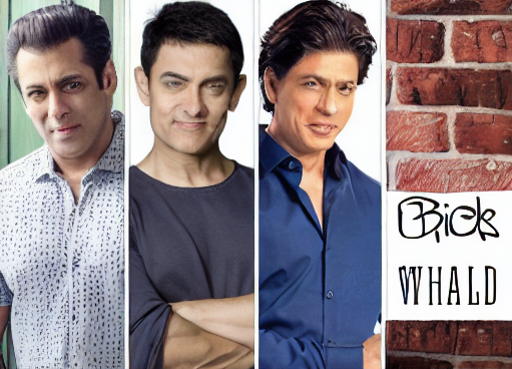

In [14]:
result


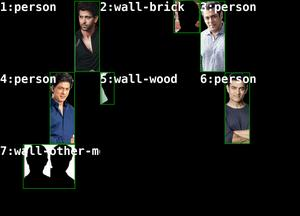
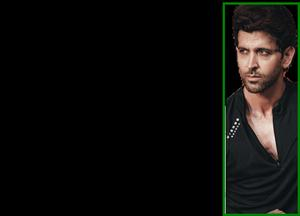
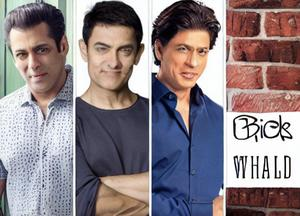
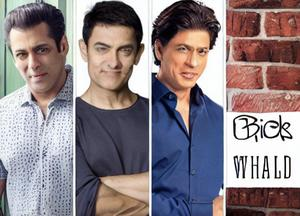

In [15]:
HTML(html_str)